In [20]:
from argparse import ArgumentParser
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mapc_research.plots.config import get_cmap

DISTANCE_MAP ={
    10: 0,
    20: 1,
    30: 2
}

# REFERENCE_AGENT = "oracle"
LABELS_MAP = {
    "oracle": "DCF",
    "sr": "SR",
    "fmab": "MAB",
    "hmab": "H-MAB",
    "opt_min": "F-Optimal",
    "opt_sum": "T-Optimal"
}
FILTERED_LABELS_MAP = {
    "oracle": "DCF",
    "fmab": "MAB",
    "hmab": "H-MAB",
    "opt_min": "F-Optimal",
    "opt_sum": "T-Optimal"
}
CMAP = get_cmap(len(LABELS_MAP))
# CMAP = {k: CMAP[i] for i, k in enumerate(LABELS_MAP.keys())}
CMAP = {k: 'tab:blue' for i, k in enumerate(LABELS_MAP.keys())}
# LABELS_MAP.pop(REFERENCE_AGENT)

X_TICKS_LABELS = ["2x2", "2x3", "3x3", "3x4", "4x4"]

RESULTS_PATH = "/Users/wciezobka/ncn/mapc-optimal-research/results/worst_case/all.csv"

In [21]:
results_df = pd.read_csv(RESULTS_PATH)
results_df

,ScenarioID,Agent,TotalThr,WorstCaseThr
0,0,opt_sum,258.000000,0.000000
1,0,opt_min,191.814581,11.988411
2,1,opt_sum,372.600000,0.000000
3,1,opt_min,229.487873,14.342992
4,2,opt_sum,401.200000,0.000000
...,...,...,...,...
76,10,hmab,372.230853,0.621444
77,11,hmab,320.975930,0.961707
78,12,hmab,321.409190,0.691466
79,13,hmab,439.580963,0.510941


In [34]:
scenario_id = 7
scenario_suffix = "3x3_d20"

# Filter the results for the given scenario
df = results_df[results_df["ScenarioID"] == scenario_id]

# Plot the difference between the WorstCaseThr and the reference value as a horizontal bar plot
fig, ax = plt.subplots()
for i, (agent, label) in enumerate(LABELS_MAP.items()):
    if agent not in FILTERED_LABELS_MAP:
        continue
    thr = df[df["Agent"] == agent]["WorstCaseThr"].values
    if thr.size == 0:
        continue
    thr = df[df["Agent"] == agent]["WorstCaseThr"].values[0]
    thr = thr if thr != 0 else -1.
    ax.barh(i, thr, color=CMAP[agent])

ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlim(-1, ax.get_xlim()[1])
# ax.set_xscale('symlog')
ax.set_xlabel('Minimum link data rate [Mb/s]', fontsize=12)
ax.set_yticks(range(len(LABELS_MAP)))
ax.set_yticklabels(LABELS_MAP[agent] for agent in LABELS_MAP)

plt.yticks(rotation=0)
plt.grid(axis='x')
plt.savefig(f"results_worst_case_scenario_{scenario_suffix}.pdf", bbox_inches='tight')
plt.clf()


<Figure size 252x155.745 with 0 Axes>

In [35]:
for distance in DISTANCE_MAP.keys():
    modulo = DISTANCE_MAP[distance]

    # Filter rows of the results dataframe to keep only the rows where scenario_id mod 3 is equal to modulo
    df_distance = results_df[results_df["ScenarioID"] % 3 == modulo]

    # Plot the difference between the WorstCaseThr and the reference value as a horizontal bar plot
    fig, ax = plt.subplots()
    unique_scenarios = df_distance["ScenarioID"].unique()
    for scenario_id in unique_scenarios:
        df = df_distance[df_distance["ScenarioID"] == scenario_id]
        for i, (agent, label) in enumerate(LABELS_MAP.items()):
            if agent not in FILTERED_LABELS_MAP:
                continue
            thr = df[df["Agent"] == agent]["WorstCaseThr"].values
            if thr.size == 0:
                continue
            thr = df[df["Agent"] == agent]["WorstCaseThr"].values[0]
            thr = thr if thr != 0 else -1.
            ax.barh(i, thr, color=CMAP[agent], alpha=0.5)

    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(-1, ax.get_xlim()[1])
    # ax.set_xscale('symlog')
    ax.set_xlabel('Minimum link data rate [Mb/s]', fontsize=12)
    ax.set_yticks(range(len(LABELS_MAP)))
    ax.set_yticklabels(LABELS_MAP[agent] for agent in LABELS_MAP)

    plt.yticks(rotation=0)
    plt.grid(axis='x')
    plt.savefig(f"results_worst_case_scenario_d{distance}.pdf", bbox_inches='tight')
    plt.clf()

<Figure size 252x155.745 with 0 Axes>

<Figure size 252x155.745 with 0 Axes>

<Figure size 252x155.745 with 0 Axes>

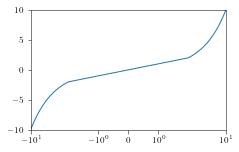

In [27]:
xs = np.linspace(-10, 10, 200)
ys = xs
plt.plot(xs, ys)
plt.xscale('symlog')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig("symlog.pdf", bbox_inches='tight')